In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter

In [516]:
# Read and create data frame for Border Entries file
bd_ent = pd.read_csv('Border_Crossing_Entry_Data.csv')

In [517]:
# Read and create data frame for Trade file
trade = pd.read_csv('COW_Trade_3.0/dyadic_trade_3.0.csv')

In [518]:
# clean trade dataframe to only get data on us imports from canada
can_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Canada')]
#flow 1 is from importer 2 into importer 1

In [519]:
# clean trade dataframe to only get data on us imoprts from mexico
mex_export = trade.loc[(trade['importer1'] == 'United States of America') & (trade['importer2'] == 'Mexico')]
#flow 1 is from importer 2 into importer 1

In [520]:
# append mexico export data frame to canada export data frame
complete_nafta_trade = can_export.append(mex_export)
#flow 1 is entering millions of dollars into US from 'importer 2'

In [521]:
nafta_trade = complete_nafta_trade[['year', 'importer1', 'importer2', 'flow1']].copy()

In [522]:
bd_ent['Year'] = pd.to_datetime(bd_ent['Date'])
bd_ent['Year'] = bd_ent['Year'].dt.year
measures = bd_ent.groupby(['Year','Border','Measure'])['Value'].sum()

In [523]:
measures = measures.reset_index()
can_measures = measures.loc[(measures['Border'] == 'US-Canada Border')]
mex_measures = measures.loc[(measures['Border'] == 'US-Mexico Border')]
can_measures = can_measures.reset_index()
mex_measures = mex_measures.reset_index()
mex_measures = mex_measures.drop(columns=['index', 'Border'])
can_measures = can_measures.drop(columns=['index','Border'])
pivot_can = can_measures.pivot(index = 'Year', columns = 'Measure', values='Value')
pivot_mex = mex_measures.pivot(index='Year', columns = 'Measure', values = 'Value')

In [524]:
# can use reset_index(drop=True) instead
nafta_trade = nafta_trade.reset_index()

In [525]:
nafta_trade = nafta_trade.drop(columns='index')

In [526]:
# if year column equals 1996 then drop previos years
nafta_can_trim = nafta_trade.drop(index = np.arange(0,76))
nafta_can_trim = nafta_can_trim.drop(index = np.arange(90,229))
nafta_can_trim = nafta_can_trim.drop(index = 229)
nafta_mex_trim = nafta_trade.drop(index = np.arange(0,216))

In [527]:
nafta_mex_trim = nafta_mex_trim.set_index('year')
mexican_trade = pivot_mex.merge(nafta_mex_trim, left_index = True, right_on = 'year')
nafta_can_trim = nafta_can_trim.set_index('year')
canadian_trade = pivot_mex.merge(nafta_can_trim, left_index = True, right_on = 'year')
all_trade = mexican_trade.append(canadian_trade)
all_trade = all_trade.drop(columns = 'importer1')

In [528]:
all_trade

,Bus Passengers,Buses,Pedestrians,Personal Vehicle Passengers,Personal Vehicles,Rail Containers Empty,Rail Containers Full,Train Passengers,Trains,Truck Containers Empty,Truck Containers Full,Trucks,importer2,flow1
year,,,,,,,,,,,,,,
1996,1943697,119510,34109364,171522486,62429373,144127,142236,11285,7509,1364375,1703402,3254084,Mexico,74111.1
1997,2772666,225749,43911311,214354991,80052978,173873,156064,11504,7678,1562595,1742414,3689665,Mexico,87167.2
1998,3638812,263340,44461554,226012670,83854491,212416,175490,12691,5681,1721558,1991368,3946543,Mexico,96077.8
1999,3358118,287819,48213234,241522310,89469745,274360,226014,16169,6019,1917071,2309816,4358721,Mexico,109499.0
2000,3465916,270792,47089642,239794552,92287520,305590,266235,18254,7108,1850581,2350100,4525579,Mexico,135080.0
2001,3366795,288285,51501321,209105846,89526957,316080,266572,18895,7469,1916207,2372125,4304959,Mexico,132778.0
2002,3926154,309360,50278281,199020692,89849415,332772,269550,15108,7757,1911367,2523074,4426593,Mexico,136144.0
2003,3746885,319087,48663773,193697482,88068391,341006,266469,12101,7774,1693207,2600019,4238045,Mexico,139702.0
2004,3388517,269027,48084235,190936607,91133889,369557,305748,12664,7844,1664660,2848240,4503688,Mexico,157821.0


# Mexico Border Analysis by State

In [529]:
# Analyze the trends ovbserved by state over time

In [530]:
# Access all rows with data related to the US-Mexico Border
mex_bd = bd_ent.loc[bd_ent['Border'] == 'US-Mexico Border'] 

In [531]:
# Make new data frame with columns that I am only interested in
mex_bd_state = mex_bd[['Year', 'State', 'Measure', 'Value']]

In [532]:
# Just observing the unique types of enterance to the border
mex_bd_state['Measure'].unique()

array(['Trucks', 'Trains', 'Truck Containers Empty', 'Bus Passengers',
       'Pedestrians', 'Personal Vehicles', 'Truck Containers Full',
       'Personal Vehicle Passengers', 'Buses', 'Train Passengers',
       'Rail Containers Full', 'Rail Containers Empty'], dtype=object)

In [533]:
# Group my mexican border data from by Year, State, Measure, and sum counts of each measure
mex_bd_state = mex_bd_state.groupby(['Year','State','Measure'])['Value'].sum()

In [534]:
# Reset my index
mex_bd_state = mex_bd_state.reset_index()

In [535]:
# pivot my data frame so that I can analyze my the total number of migrants coming into the US from Mexico by state over time
pvt_mex_bd_state = pd.pivot_table(mex_bd_state, values=['Value'], index='Year',
                 columns=['State', 'Measure'])

In [536]:
# Since 2019 is not complete. Remove this row from the dataframe
pvt_mex_bd_state = pvt_mex_bd_state.drop(2019, axis=0)

In [537]:
# Find the total number of persons coming into each state on the Mexican Border
mex_per_table = pvt_mex_bd_state[pvt_mex_bd_state.columns[[0,2,3,7,12,14,15,19,24,26,27,31,36,38,39,43]]]
# These numbers are massive

In [538]:
# sum across rows to find total number of people coming into each year
az_per_mig = mex_per_table[('Value','Arizona')].sum(axis=1)

In [539]:
# Do the same for california
cal_per_mig = mex_per_table[('Value','California')].sum(axis=1)

In [540]:
# merge these two series
mex_per_sum = pd.concat([az_per_mig, cal_per_mig], axis=1)

In [541]:
# rename columns
mex_per_sum = mex_per_sum.rename(columns={0: "Arizona", 1: "California"})

In [542]:
# Perform same analysis for new mexico
nm_per_mig = mex_per_table[('Value','New Mexico')].sum(axis=1)

In [543]:
# merge new mexico series to the mexican persons summed dataframe
# mex_per_sum = pd.concat([mex_per_sum, nm_per_mig], axis=1)
mex_per_sum = mex_per_sum.merge(nm_per_mig.to_frame(), left_index=True, right_index=True)

In [544]:
# rename new column to New Mexico
mex_per_sum = mex_per_sum.rename(columns={0: "New Mexico"})

In [545]:
# Do same analysis for Texas
tx_per_mig = mex_per_table[('Value','Texas')].sum(axis=1)

In [546]:
# Merge TX series to dataframe
mex_per_sum = mex_per_sum.merge(tx_per_mig.to_frame(), left_index=True, right_index=True)

In [547]:
# rename new colum to Texas
mex_per_sum = mex_per_sum.rename(columns={0: "Texas"})

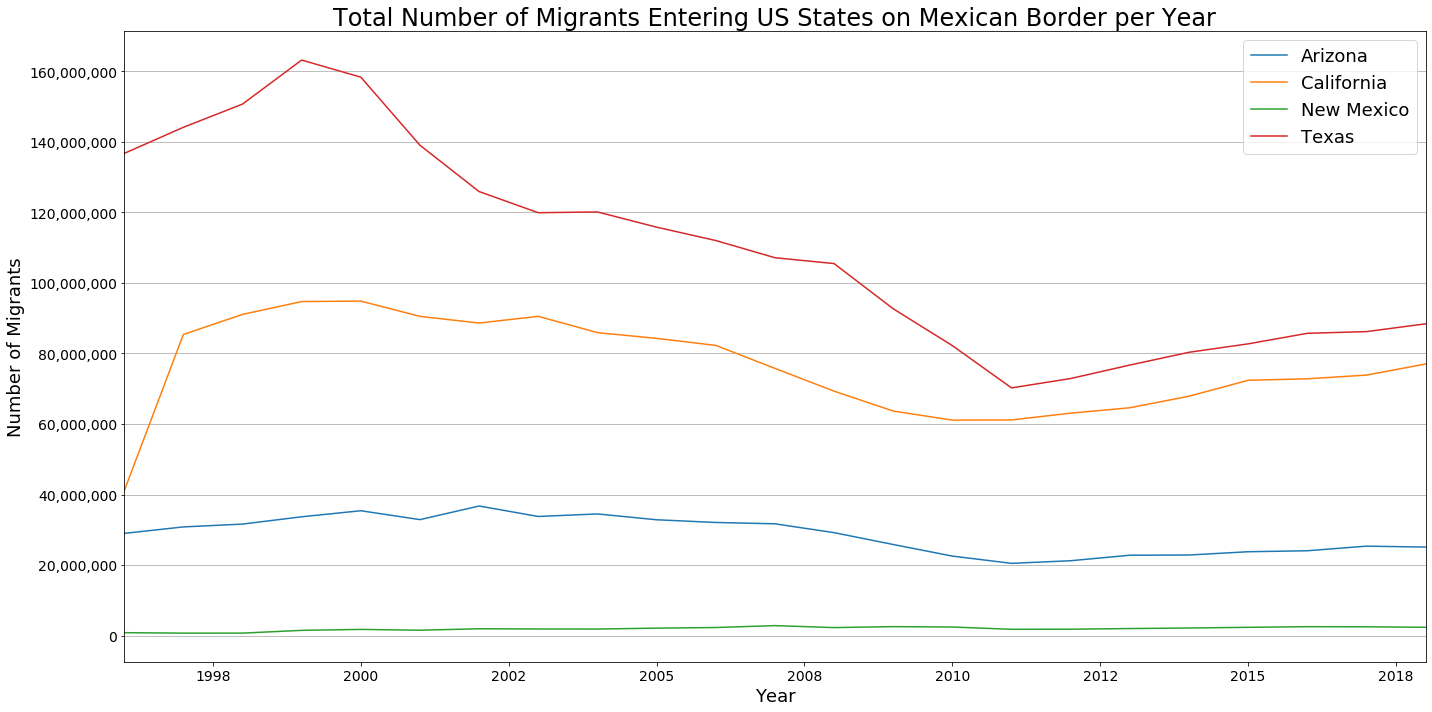

In [548]:
# Plot my findings

# mex_per_sum.plot(kind='line',)
# plt.legend(['Arizona','California','New Mexico','Texas'])
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.ylabel('Pedestrians (10s of Millions)')
# plt.title('Number of Pedestrians Crossing Mexican Border per State')

mex_per_sum.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Migrants', fontsize=18)
plt.title('Total Number of Migrants Entering US States on Mexican Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('Annual_Mexican_Migration')

# I should drop 2019 from my graph since data is only collected until 2019

In [549]:
totals_mex_mig = mex_per_table.sum()

In [550]:
totals_mex_mig = totals_mex_mig.reset_index()

In [551]:
totals_mex_mig = totals_mex_mig.drop('level_0', axis=1)

In [552]:
totals_mex_mig = totals_mex_mig.rename(columns={0:'Total Migrants'})

In [553]:
# Another way to drop a column
# totals_mex_com_df = totals_mex_com_df.drop(columns='level_0')

In [554]:
totals_mex_mig = totals_mex_mig.pivot(index='State', columns='Measure', values='Total Migrants')

In [555]:
totals_mex_mig = totals_mex_mig/1000000

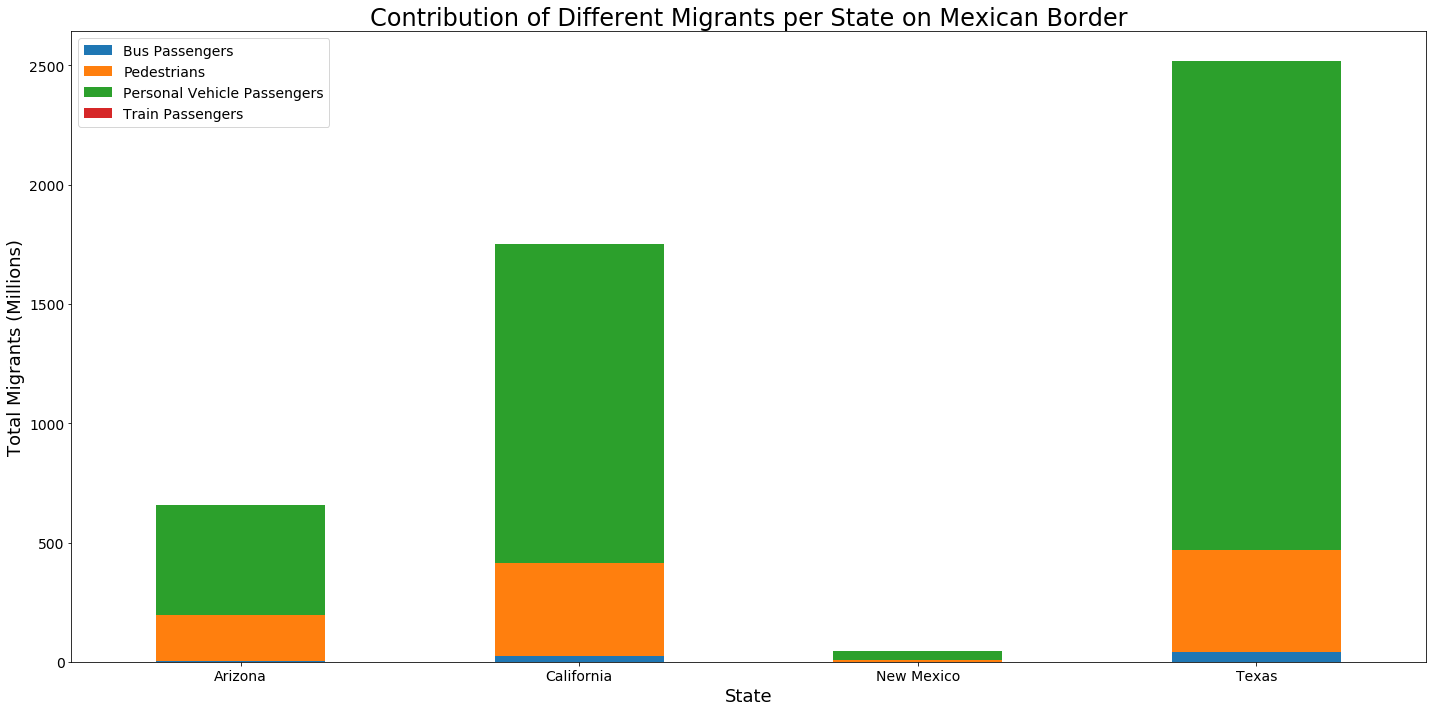

In [556]:
totals_mex_mig.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Total Migrants (Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Contribution of Different Migrants per State on Mexican Border', fontsize=24)
plt.tight_layout()

plt.savefig('Contribution_of_Migrant_by_Type_from_Mexico')

# Commercial Imports Analysis into Mexican Border States

In [557]:
mex_com_df = pvt_mex_bd_state[pvt_mex_bd_state.columns[[6,10,18,22,30,34,42,46]]]

In [558]:
az_com_imp = mex_com_df[('Value','Arizona')].sum(axis=1)

In [559]:
cal_com_imp = mex_com_df[('Value','California')].sum(axis=1)

In [560]:
mex_com_imp = pd.concat([az_com_imp, cal_com_imp], axis=1)

In [561]:
mex_com_imp = mex_com_imp.rename(columns={0:'Arizona', 1:'California'})

In [562]:
nm_com_imp = mex_com_df[('Value','New Mexico')].sum(axis=1)

In [563]:
mex_com_imp = mex_com_imp.merge(nm_com_imp.to_frame(), left_index=True, right_index=True)

In [564]:
mex_com_imp = mex_com_imp.rename(columns={0:'New Mexico'})

In [565]:
tx_com_imp = mex_com_df[('Value','Texas')].sum(axis=1)

In [566]:
mex_com_imp = mex_com_imp.merge(tx_com_imp.to_frame(), left_index=True, right_index=True)

In [567]:
mex_com_imp = mex_com_imp.rename(columns={0:'Texas'})

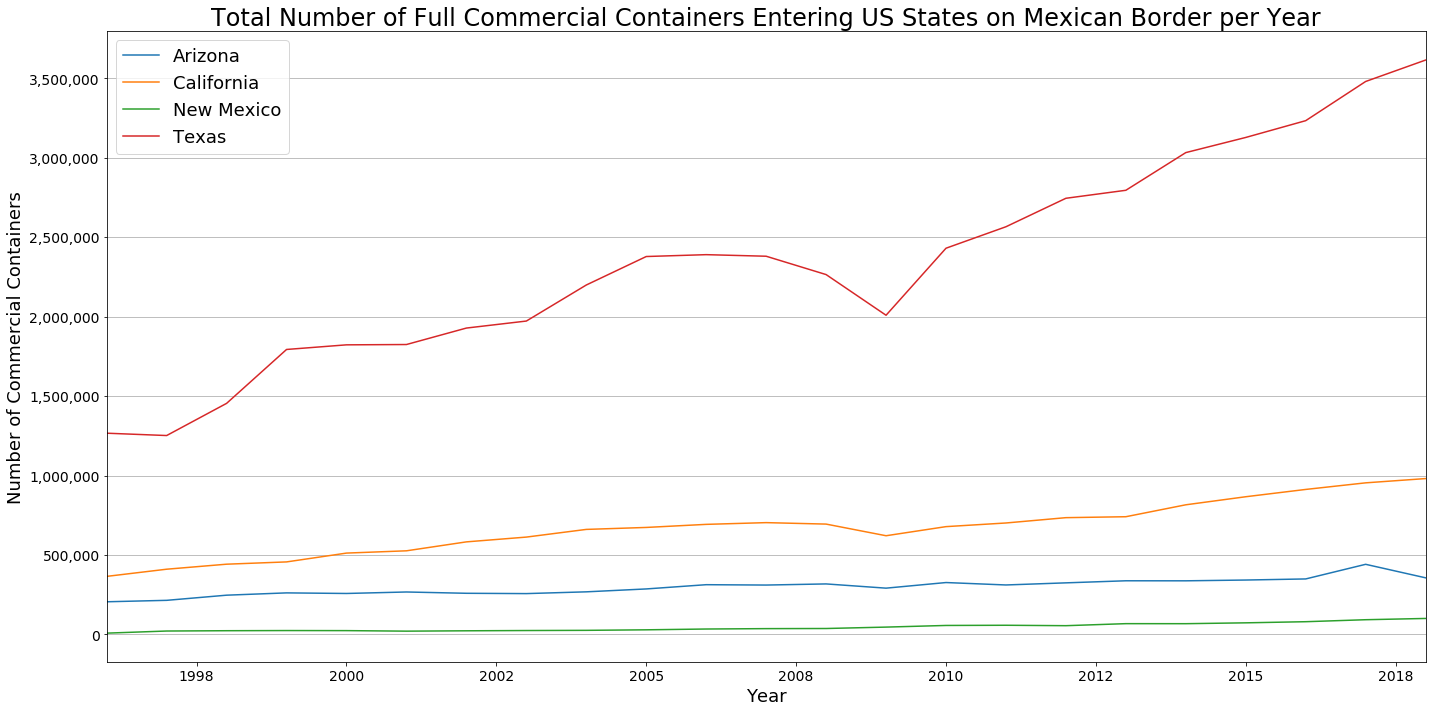

In [568]:
mex_com_imp.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Commercial Containers', fontsize=18)
plt.title('Total Number of Full Commercial Containers Entering US States on Mexican Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()

plt.savefig('Annual_Container_Imports_from_Mexico')

In [569]:
totals_mex_com_df = mex_com_df.sum()

In [570]:
totals_mex_com_df = totals_mex_com_df.reset_index()

In [571]:
totals_mex_com_df = totals_mex_com_df.rename(columns={0:'Total Containers'})

In [572]:
totals_mex_com_df = totals_mex_com_df.drop(columns='level_0')

In [573]:
totals_mex_com_df = totals_mex_com_df.pivot(index='State', columns='Measure', values='Total Containers')

In [574]:
totals_mex_com_df = totals_mex_com_df/1000000

In [575]:
totals_mex_com_df.index

Index(['Arizona', 'California', 'New Mexico', 'Texas'], dtype='object', name='State')

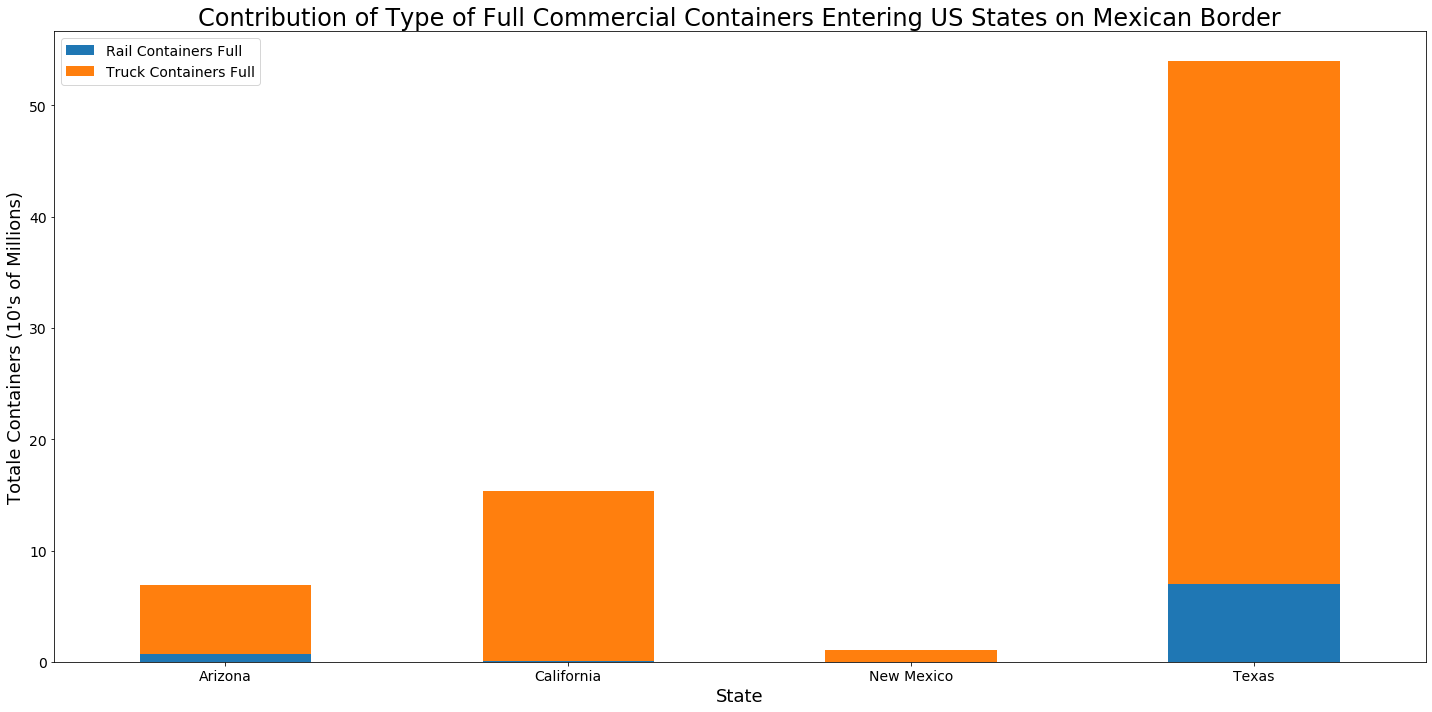

In [576]:
totals_mex_com_df.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Totale Containers (10\'s of Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Contribution of Type of Full Commercial Containers Entering US States on Mexican Border', fontsize=24)
plt.tight_layout()


plt.savefig('Contribution_of_Containers_by_Type_From_Mexico')

# Canada Border Analysis by State

In [577]:
can_bd = bd_ent.loc[bd_ent['Border'] == 'US-Canada Border'] 

In [578]:
can_bd_state = can_bd[['Year', 'State', 'Measure', 'Value']]

In [579]:
can_bd_state['Measure'].unique()

array(['Rail Containers Full', 'Personal Vehicle Passengers', 'Trucks',
       'Bus Passengers', 'Rail Containers Empty', 'Personal Vehicles',
       'Buses', 'Truck Containers Full', 'Pedestrians',
       'Train Passengers', 'Trains', 'Truck Containers Empty'],
      dtype=object)

In [580]:
can_bd_state = can_bd_state.groupby(['Year','State','Measure'])['Value'].sum()

In [581]:
can_bd_state = can_bd_state.reset_index()

In [582]:
can_bd_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 4 columns):
Year       2870 non-null int64
State      2870 non-null object
Measure    2870 non-null object
Value      2870 non-null int64
dtypes: int64(2), object(2)
memory usage: 89.8+ KB


In [583]:
pvt_can_bd_state = pd.pivot_table(can_bd_state, values=['Value'], index='Year',
                                  columns=['State', 'Measure'])

In [584]:
pvt_can_bd_state = pvt_can_bd_state.drop(index=2019)

In [585]:
can_bd.State.unique()

array(['Maine', 'New York', 'North Dakota', 'Montana', 'Minnesota',
       'Vermont', 'Washington', 'Idaho', 'Michigan', 'Alaska', 'Ohio'],
      dtype=object)

In [586]:
can_ped_table = pvt_can_bd_state[pvt_can_bd_state.columns[[2,14,26,38,50,62,74,86,98,110]]]

Something seems wrong with my data frame. The frequency at which the pedestrian column occurs is staggared after North Dakota

In [587]:
ohio_bd = can_bd.loc[can_bd['State'] == 'Ohio']

In [588]:
# Next State in alphabetically is Ohio
ohio_bd.Measure.unique()
# Seems there is only type of measure for Ohio which is staggering my canadian dataframe

array(['Personal Vehicles'], dtype=object)

In [589]:
# Corrected dataframe for pedestrian migration
can_ped_table = pvt_can_bd_state[pvt_can_bd_state.columns[[2,14,26,38,50,62,74,86,99,111]]]

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

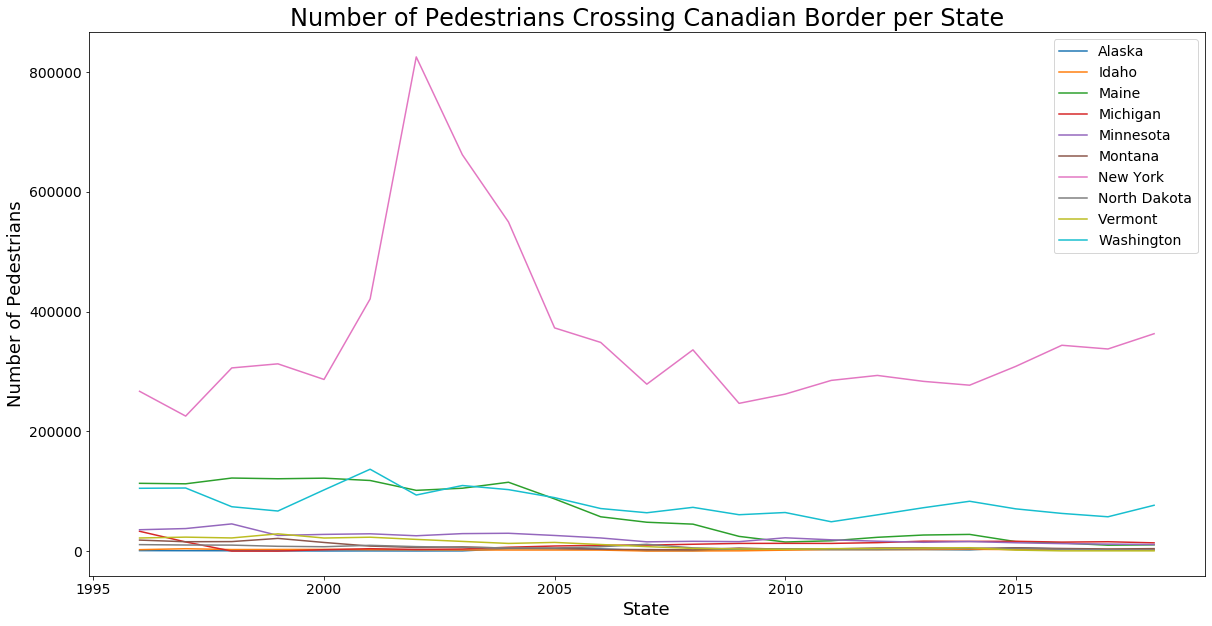

In [590]:
plt.plot(can_ped_table)
plt.legend(['Alaska', 'Idaho','Maine','Michigan','Minnesota','Montana','New York','North Dakota','Vermont','Washington'], fontsize=14)
plt.ylabel('Number of Pedestrians', fontsize=18)
plt.title('Number of Pedestrians Crossing Canadian Border per State', fontsize=24)

plt.xlabel('State', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout

In [591]:
# Also, I am more interested in all people crossing the canadian border, not just pedestrians. Iclude, Bus passengers, and Personal Vehicle Passengers
can_mig = pvt_can_bd_state[pvt_can_bd_state.columns[[0,2,3,7,12,14,15,19,24,26,27,31,36,38,39,43,48,50,51,55,60,62,63,67,72,74,75,79,84,86,87,91,97,99,100,104,109,111,112,116]]]

In [592]:
ak_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[0,2,3,7]]].sum(axis=1)

In [593]:
id_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[12,14,15,19]]].sum(axis=1)

In [594]:
can_per_table = pd.concat([ak_per_table, id_per_table], axis=1)

In [595]:
can_per_table = can_per_table.rename(columns={0: "Alaska", 1: "Idaho"})

In [596]:
main_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[24,26,27,31]]].sum(axis=1)

In [597]:
can_per_table = can_per_table.merge(main_per_table.to_frame(), left_index=True, right_index=True)

In [598]:
can_per_table = can_per_table.rename(columns={0: "Main"})

In [599]:
mich_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[36,38,39,43]]].sum(axis=1)

In [600]:
can_per_table = can_per_table.merge(mich_per_table.to_frame(), left_index=True, right_index=True)

In [601]:
can_per_table = can_per_table.rename(columns={0: "Michigan"})

In [602]:
minn_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[48,50,51,55]]].sum(axis=1)

In [603]:
can_per_table = can_per_table.merge(minn_per_table.to_frame(), left_index=True, right_index=True)

In [604]:
can_per_table = can_per_table.rename(columns={0: "Minnesota"})

In [605]:
mont_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[60,62,63,67]]].sum(axis=1)

In [606]:
can_per_table = can_per_table.merge(mont_per_table.to_frame(), left_index=True, right_index=True)

In [607]:
can_per_table = can_per_table.rename(columns={0: "Montana"})

In [608]:
ny_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[72,74,75,79]]].sum(axis=1)

In [609]:
can_per_table = can_per_table.merge(ny_per_table.to_frame(), left_index=True, right_index=True)

In [610]:
can_per_table = can_per_table.rename(columns={0: "New York"})

In [611]:
nd_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[84,86,87,91]]].sum(axis=1)

In [612]:
can_per_table = can_per_table.merge(nd_per_table.to_frame(), left_index=True, right_index=True)

In [613]:
can_per_table = can_per_table.rename(columns={0: "North Dakota"})

In [614]:
vt_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[97,99,100,104]]].sum(axis=1)

In [615]:
can_per_table = can_per_table.merge(vt_per_table.to_frame(), left_index=True, right_index=True)

In [616]:
can_per_table = can_per_table.rename(columns={0: "Vermont"})

In [617]:
wash_per_table = pvt_can_bd_state[pvt_can_bd_state.columns[[109,111,112,116]]].sum(axis=1)

In [618]:
can_per_table = can_per_table.merge(wash_per_table.to_frame(), left_index=True, right_index=True)

In [619]:
can_per_table = can_per_table.rename(columns={0: "Washington"})

In [620]:
can_per_table = can_per_table/1000000

Text(0.5, 0, 'Year')

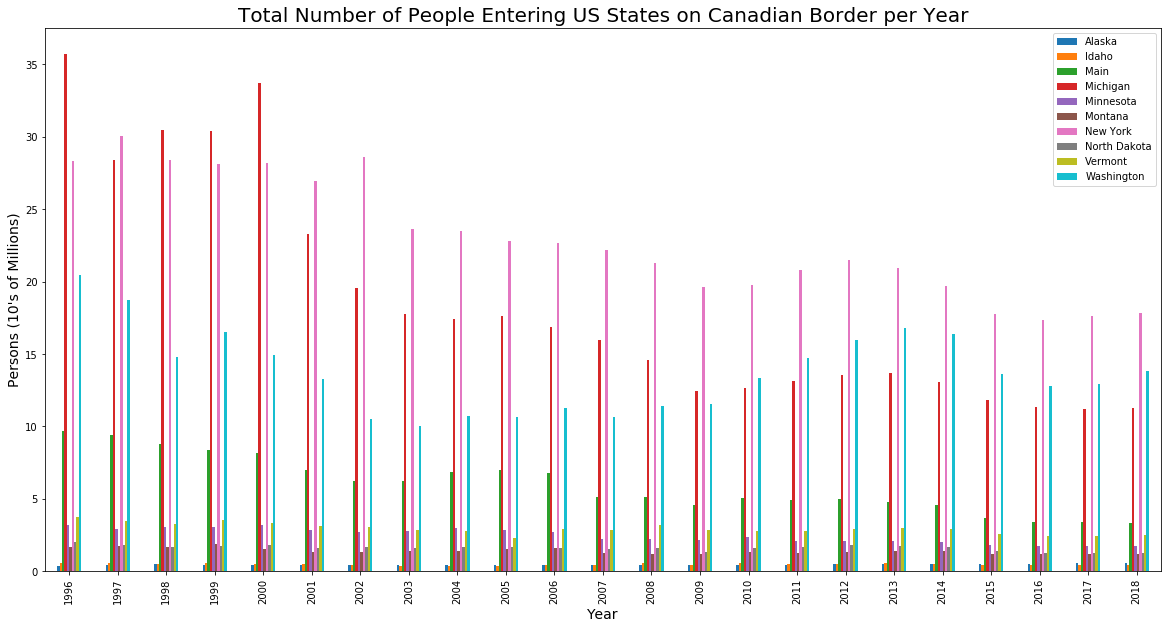

In [621]:
can_per_table.plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Persons (10\'s of Millions)', fontsize=14)
plt.title('Total Number of People Entering US States on Canadian Border per Year', fontsize=20)
plt.xlabel('Year', fontsize=14)

Lets look at this as a line graph

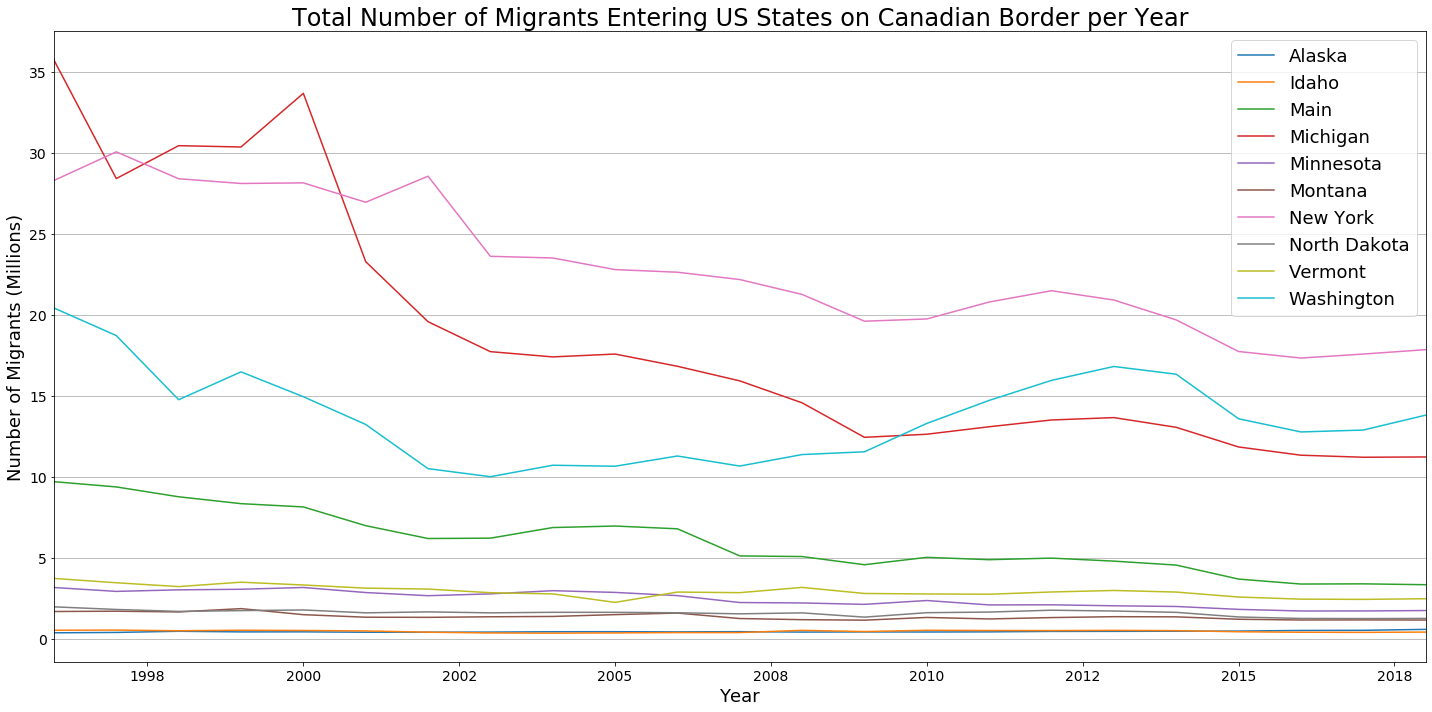

In [622]:
can_per_table.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Migrants (Millions)', fontsize=18)
plt.title('Total Number of Migrants Entering US States on Canadian Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()

plt.savefig('Annual_Canadian_Migration')

In [623]:
can_mig_total = can_mig.sum()

In [624]:
can_mig_total = can_mig_total.reset_index()

In [625]:
can_mig_total = can_mig_total.drop(columns='level_0')

In [626]:
can_mig_total = can_mig_total.rename(columns={0:'Total Migrants'})

In [627]:
can_mig_total = can_mig_total.pivot(index='State', columns='Measure', values='Total Migrants')

In [628]:
can_mig_total = can_mig_total/1000000

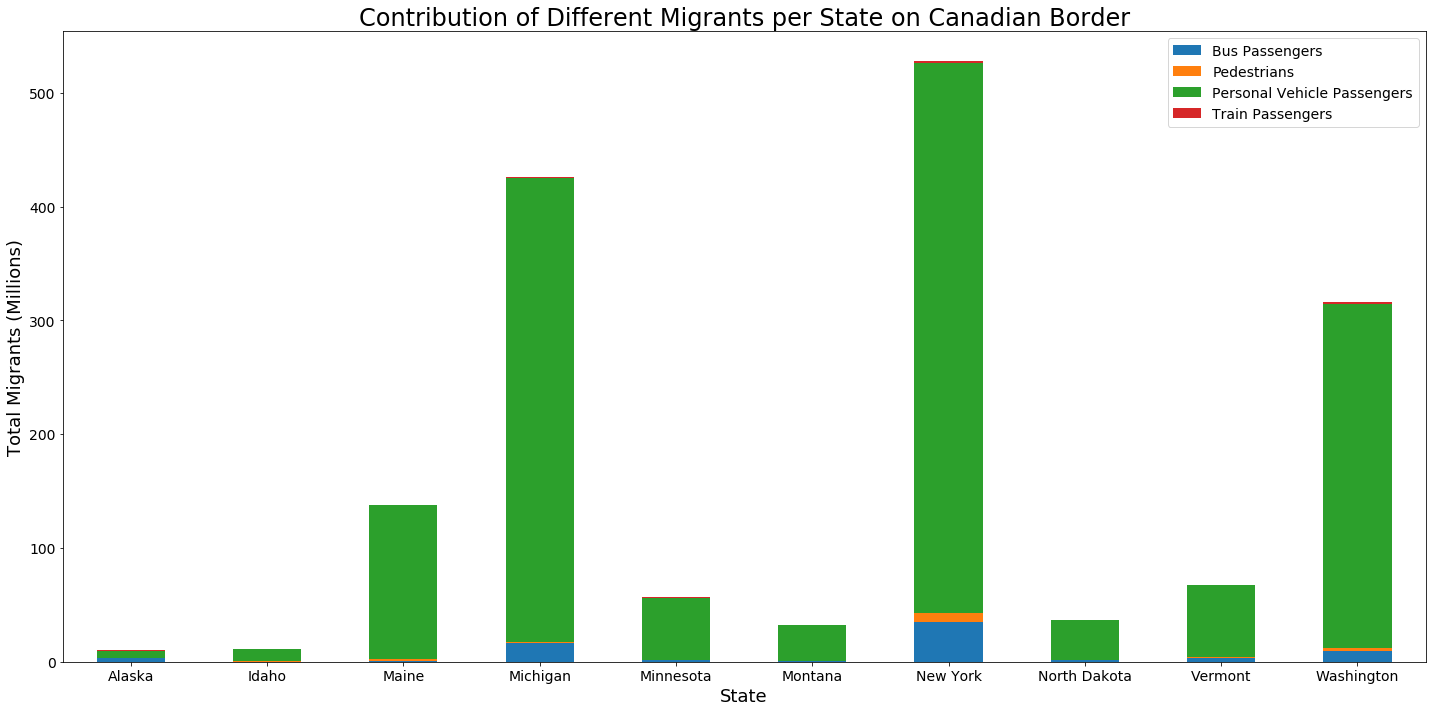

In [629]:
can_mig_total.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Total Migrants (Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Contribution of Different Migrants per State on Canadian Border', fontsize=24)
plt.tight_layout()

plt.savefig('Contribution_of_Migrant_by_Type_from_Canada')

# Now lets look at commercial imports

In [630]:
#Include all measures related to commercial movement. Include Rail Containers Full as well as Truck Containers Full
can_com_cont = pvt_can_bd_state[pvt_can_bd_state.columns[[6,10,18,22,30,34,42,46,54,58,66,70,78,82,90,94,103,107,115,119]]]

Seems like there are so null values. Need to change these to zeros

In [631]:
can_com_cont = can_com_cont.dropna(0)

In [632]:
ak_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[6,10]]].sum(axis=1)

id_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[18,22]]].sum(axis=1)

can_com_table = pd.concat([ak_com_table, id_com_table], axis=1)

can_com_table = can_com_table.rename(columns={0: "Alaska", 1: "Idaho"})

main_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[30,34]]].sum(axis=1)

can_com_table = can_com_table.merge(main_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Main"})

mich_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[42,46]]].sum(axis=1)

can_com_table = can_com_table.merge(mich_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Michigan"})

minn_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[54,58]]].sum(axis=1)

can_com_table = can_com_table.merge(minn_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Minnesota"})

mont_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[66,70]]].sum(axis=1)

can_com_table = can_com_table.merge(mont_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Montana"})

ny_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[78,82]]].sum(axis=1)

can_com_table = can_com_table.merge(ny_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "New York"})

nd_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[91,95]]].sum(axis=1)

can_com_table = can_com_table.merge(nd_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "North Dakota"})

vt_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[103,107]]].sum(axis=1)

can_com_table = can_com_table.merge(vt_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Vermont"})

wash_com_table = pvt_can_bd_state[pvt_can_bd_state.columns[[115,119]]].sum(axis=1)

can_com_table = can_com_table.merge(wash_com_table.to_frame(), left_index=True, right_index=True)

can_com_table = can_com_table.rename(columns={0: "Washington"})



In [633]:
can_com_table.head()

,Alaska,Idaho,Main,Michigan,Minnesota,Montana,New York,North Dakota,Vermont,Washington
Year,,,,,,,,,,
1996,0.0,69859.0,173827.0,853228.0,51647.0,139077.0,1170.0,274432.0,109295.0,278755.0
1997,990.0,69814.0,233824.0,1168887.0,81487.0,155240.0,162460.0,305420.0,137031.0,419704.0
1998,7816.0,76426.0,355493.0,2415279.0,252425.0,164722.0,910993.0,311522.0,180928.0,612966.0
1999,6573.0,86919.0,374691.0,2645129.0,292565.0,182542.0,1734422.0,329986.0,206057.0,582849.0
2000,7244.0,98204.0,372427.0,2597482.0,304263.0,186304.0,1900927.0,349705.0,254420.0,412014.0


In [634]:
# access only alaskan commercial imports
# al_com_mig = can_com_table[('Value','Alaska')].head()
# al_com_mig

In [635]:
# al_com_imp = can_com_table[('Value','Alaska')].sum(axis=1)

In [636]:
# id_com_imp = can_com_table[('Value','Idaho')].sum(axis=1)

In [637]:
# can_com_table_sum = pd.concat([al_com_imp, id_com_imp], axis=1)
# can_com_table_sum.head()

In [638]:
# can_com_table_sum = can_com_table_sum.rename(columns={0: "Alaska", 1: "Idaho"})
# can_com_table_sum.head()

In [639]:
# It would be better to loop this for each state
# state = ['Main','Michigan','Minnesota','Monatana','New York', 'North Dakota','Vermont','Washington']

# for state in state:
#     can_state = can_com_table[('Value', state)].sum(axis=1)
#     can_com_table_sum = can_com_table_sum.merge(can_state.to_frame(), left_index=True, right_index=True)
#     can_com_table_sum = can_com_table_sum.rename(columns={0: state})
    
# can_com_table_sum   

In [640]:
can_com_table = can_com_table/1000000

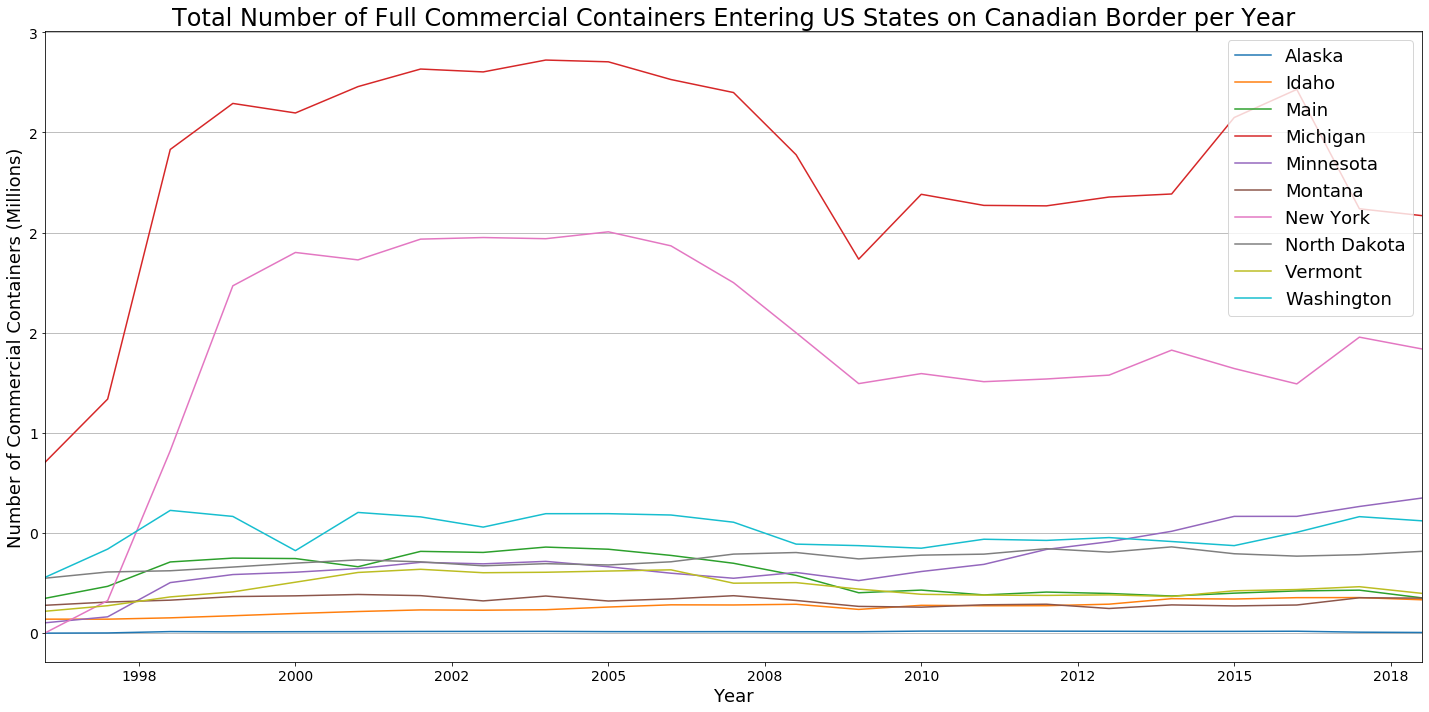

In [641]:
can_com_table.plot(kind='line')
plt.rcParams["figure.figsize"] = (20,10)
plt.ylabel('Number of Commercial Containers (Millions)', fontsize=18)
plt.title('Total Number of Full Commercial Containers Entering US States on Canadian Border per Year', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.legend(loc='upper right', fontsize=18)
plt.xticks(style='normal',fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()

plt.savefig('Annual_Container_Imports_from_Canada')

In [642]:
can_com_cont_sum = can_com_cont.sum()

In [643]:
can_com_cont_sum = can_com_cont_sum.reset_index()

In [644]:
can_com_cont_sum = can_com_cont_sum.drop(columns='level_0')

In [645]:
can_com_cont_sum = can_com_cont_sum.rename(columns={0:'Total Containers'})

In [646]:
can_com_cont_sum = can_com_cont_sum.pivot(index='State', columns='Measure', values='Total Containers')

In [647]:
can_com_cont_sum = can_com_cont_sum/1000000

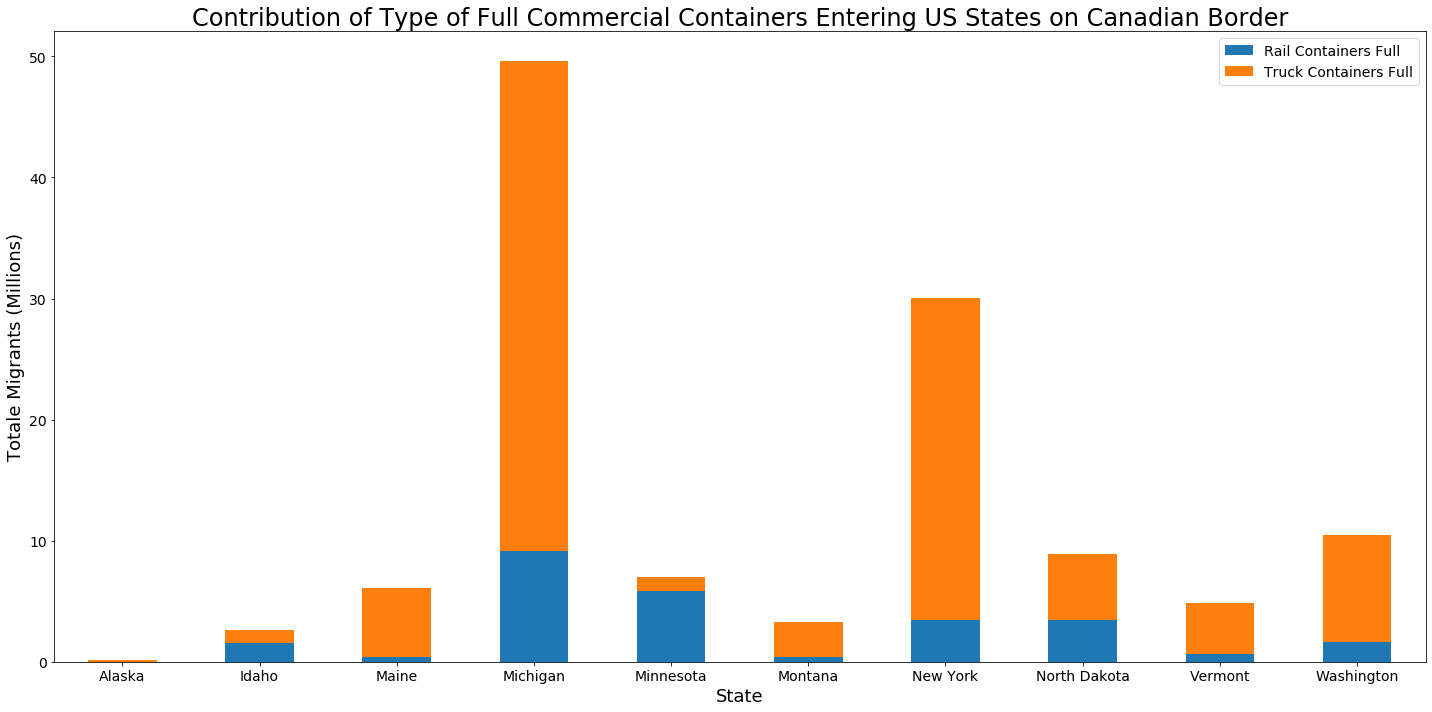

In [648]:
can_com_cont_sum.plot(kind='bar', stacked=True)
plt.xlabel('State', fontsize=18)
plt.ylabel('Totale Migrants (Millions)', fontsize=18)
plt.xticks(fontsize=14, rotation='horizontal')
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.title('Contribution of Type of Full Commercial Containers Entering US States on Canadian Border', fontsize=24)
plt.tight_layout()

plt.savefig('Contribution_of_Containers_by_Type_From_Canada')

# Ports of Entry Analysis on Mexican Border

In [649]:
cal_ports = mex_bd.loc[mex_bd['State'] == 'California']

In [650]:
tex_ports = mex_bd.loc[mex_bd['State'] == 'Texas']

In [651]:
cal_tex_ports = cal_ports.append(tex_ports)

In [652]:
cal_tex_ports = cal_tex_ports.groupby(['Year', 'State', 'Port Name'])['Value'].sum()

In [653]:
cal_tex_ports = cal_tex_ports.reset_index()
cal_tex_ports

,Year,State,Port Name,Value
0,1996,California,Andrade,3551780
1,1996,California,Calexico,32172466
2,1996,California,Calexico East,0
3,1996,California,Otay Mesa,13555563
4,1996,California,San Ysidro,0
...,...,...,...,...
411,2019,Texas,Presidio,612015
412,2019,Texas,Progreso,1450178
413,2019,Texas,Rio Grande City,367777
414,2019,Texas,Roma,621634


In [654]:
cal_tex_ports = pd.pivot_table(cal_tex_ports, values=['Value'], index='Year',
                 columns=['State', 'Port Name'])

In [655]:
cal_tex_ports = cal_tex_ports.drop(index=2019)
cal_tex_ports

Value                                                \
State     California                                                 
Port Name    Andrade    Calexico Calexico East Cross Border Xpress   
Year                                                                 
1996       3551780.0  32172466.0           0.0                 NaN   
1997       3573449.0  34007914.0     7418320.0                 NaN   
1998       3772276.0  36221460.0     7556984.0                 NaN   
1999       4077016.0  35338551.0     9268961.0                 NaN   
2000       4184302.0  35221950.0    10639009.0                 NaN   
2001       3801361.0  28531376.0    11011102.0                 NaN   
2002       3978552.0  24982559.0    10979703.0                 NaN   
2003       3936144.0  21651265.0     9853086.0                 NaN   
2004       4360293.0  21125522.0    10195639.0                 NaN   
2005       4066174.0  22594492.0    10416832.0                 NaN   
2006       3724936.0  21852464.0    12189726.0                 NaN   
2007       3246601.0  22014043.0    11121102.0                 NaN   
2008       2622600.0  18778009.0    11413669.0                 NaN   
2009       2851344.0  17370563.0     9321370.0                 NaN   
2010       2080664.0  16211597.0     8506001.0                 NaN   
2011       2009751.0  15646294.0     8711024.0                 NaN   
2012       2138004.0  15937359.0     9627755.0                 NaN   
2013       2022060.0  16038821.0    10179331.0                 NaN   
2014       2165243.0  15860527.0    10927817.0                 NaN   
2015       2377624.0  16436626.0    11407619.0                 NaN   
2016       2420383.0  16449609.0    11962231.0                 NaN   
2017       2600148.0  16482156.0    12163690.0            283263.0   
2018       2596157.0  16971417.0    11236590.0           1279074.0   

                                                                               \
State                                            Texas                          
Port Name   Otay Mesa  San Ysidro     Tecate Boquillas Brownsville    Del Rio   
Year                                                                            
1996       13555563.0         0.0  4380708.0       NaN  25679500.0  7267509.0   
1997       14166189.0  50299485.0  4570883.0       NaN  26023930.0  7590354.0   
1998       15950830.0  54226556.0  4341838.0       NaN  27197787.0  7791741.0   
1999       16622698.0  57382892.0  4645244.0       NaN  30875561.0  8402515.0   
2000       18420942.0  54690227.0  4974122.0       NaN  31421429.0  8237190.0   
2001       15309236.0  60440790.0  3803135.0       NaN  28373944.0  6774467.0   
2002       17007882.0  61813805.0  4131105.0       NaN  27596571.0  7149948.0   
2003       19188490.0  66246903.0  4636722.0       NaN  26440950.0  6618609.0   
2004       21305060.0  61603910.0  4287185.0       NaN  26112299.0  6417355.0   
2005       22336751.0  58731200.0  3703800.0       NaN  25180631.0  6186007.0   
2006       19752256.0  57976416.0  3480927.0       NaN  24578153.0  6015127.0   
2007       16508275.0  52816182.0  3411492.0       NaN  23266269.0  5411915.0   
2008       16809912.0  47070214.0  3438306.0       NaN  23081840.0  4753839.0   
2009       15729359.0  44003475.0  3109392.0       NaN  19686315.0  3898243.0   
2010       14884003.0  44009770.0  2968965.0       NaN  16814487.0  3818783.0   
2011       15892748.0  42878634.0  3026204.0       NaN  14712887.0  3972880.0   
2012       19615896.0  40213126.0  3077580.0       NaN  15191799.0  4042978.0   
2013       22179950.0  39543153.0  3062824.0       NaN  15394973.0  4139383.0   
2014       24221610.0  41535749.0  3255486.0       NaN  15628652.0  4423968.0   
2015       24411844.0  47629073.0  3399496.0    7007.0  15777337.0  4716036.0   
2016       26706980.0  45376612.0  3666639.0   14099.0  17190592.0  4965171.0   
2017       27181889.0  45983570.0  3985503.0   10965.0  18301371.0  5175016.0   
2018       2641195

In [656]:
cal_tex_ports = cal_tex_ports.sum()
cal_tex_ports

       State       Port Name          
Value  California  Andrade                7.215686e+07
                   Calexico               5.178970e+08
                   Calexico East          2.261076e+08
                   Cross Border Xpress    1.562337e+06
                   Otay Mesa              4.441703e+08
                   San Ysidro             1.123680e+09
                   Tecate                 8.754467e+07
       Texas       Boquillas              4.357000e+04
                   Brownsville            5.128640e+08
                   Del Rio                1.328937e+08
                   Eagle Pass             2.524835e+08
                   El Paso                1.141556e+09
                   Hidalgo                5.648520e+08
                   Laredo                 6.473458e+08
                   Presidio               5.459793e+07
                   Progreso               1.090040e+08
                   Rio Grande City        5.359028e+07
                   Roma   

In [657]:
cal_tex_ports = cal_tex_ports.reset_index()

In [658]:
cal_tex_ports = cal_tex_ports.rename(columns={0:'Total Entries'})

In [659]:
cal_tex_ports = cal_tex_ports.sort_values('Total Entries', ascending=False)

In [660]:
cal_tex_ports = cal_tex_ports.drop(columns='level_0')
cal_tex_ports.head()

,State,Port Name,Total Entries
11,Texas,El Paso,1.141556e+09
5,California,San Ysidro,1.123680e+09
13,Texas,Laredo,6.473458e+08
12,Texas,Hidalgo,5.648520e+08
1,California,Calexico,5.178970e+08


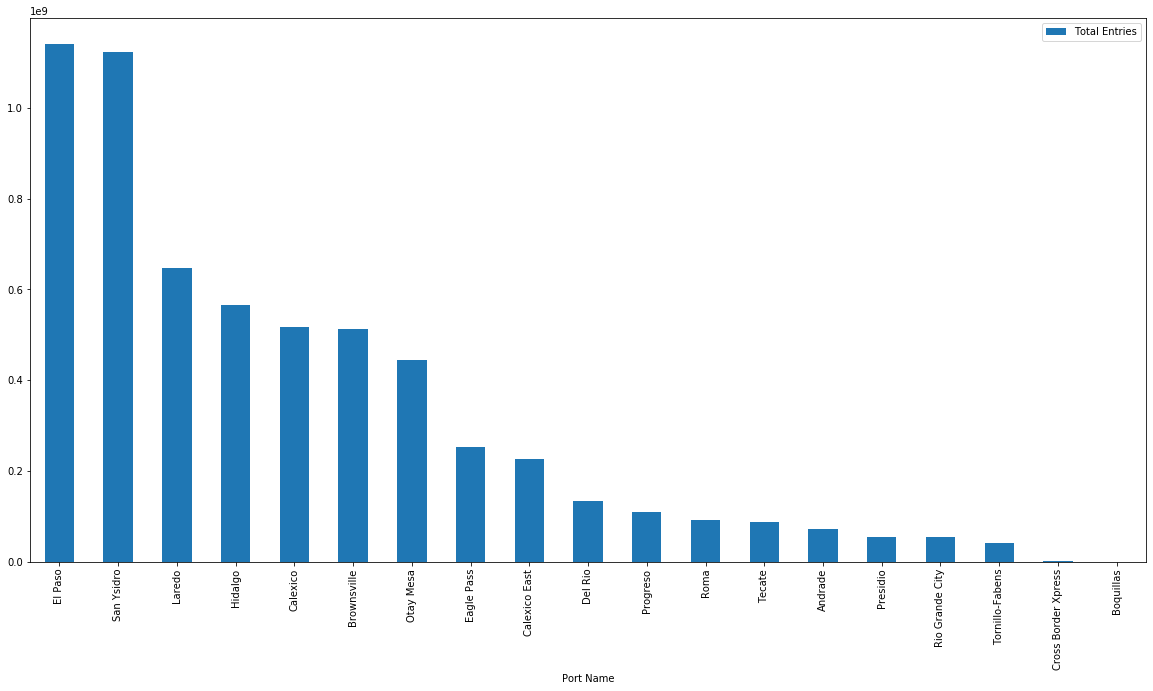

In [661]:
cal_tex_ports.plot(kind='bar', x='Port Name', y='Total Entries')

In [514]:
# Curious to see if population of US border city has a coleraltion with number of migrants passing through ports.
# Should Probably consider Mexican Border cities as well

city = ['El Paso', 'San Diego', 'Laredo', 'Hildago', 'Calexico','Brownsville']
city_pop = [683577, 1420000, 260654, 13931, 40351, 183299, ]